<a href="https://colab.research.google.com/github/jvitordeoliveira96/UFRJ_courses/blob/main/ALA_ICP115/Assignments/Lab_A_aula_24_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Álgebra Linear Algorítmica 2021.2**

**Professor: João Vitor de Oliveira Silva**

**Laboratório A**




Neste primeiro laboratório, você irá praticar e visualizar alguns conceitos de álgebra linear no plano (ou no $\mathbb{R}^2$) no ambiente do Google Colaboratory. Para realizar esta atividade, é esperado que tenha conhecimento dos *notebooks* de tutorial

$$\mathtt{Introducao\_ao\_Colab\_pt1.ipynb}$$

$$\mathtt{Introducao\_ao\_Colab\_pt2.ipynb}$$ 

presentes na seção Materiais e Extras.


*Para realizar uma cópia editável deste esqueleto, você pode clicar em Arquivo > Salvar uma cópia no Drive. Você pode remover as células de texto de enunciado e de avisos*, **mas mantendo as células de texto que marcam o início das questões.**

---
###**OBS**:


*   **Este laboratório não precisa ser entregue. Iremos fazê-lo juntos na aula de quarta feira. Apenas laboratórios com entrega a partir da terceira semana é que serão pontuados.**



In [ ]:
# Bibliotecas que sao necessarias ou podem auxiliar a realizacao desta atividade
import numpy as np
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

## Exercício 1




Realize o desenho das bases

$$ \color{blue}{\varepsilon = \{e_1, e_2\}}, \quad \color{red}{\beta = \{u_1, u_2\}} $$
em que $\color{red}{u_1}$ é o vetor obtido normalizando $(2,3)$ e $\color{red}{u_2}$ é o vetor obtido normalizando $(-3,2)$. 



*   Os vetores da base $\varepsilon$ devem estar na cor azul, já os da base $\beta$ devem estar na cor vermelho.
*   Desenhe os vetores no gráfico juntamente com seus nomes, assim como é feito no tutorial $\mathtt{Introducao\_ao\_Colab\_pt2.ipynb}$ (usando **`ax.annotate`**).
*   Lembre-se que  *normalizar* um vetor significa dividi-lo por sua norma para obter um vetor unitário; isto é, de norma igual a um. Use como base o esqueleto de código abaixo.


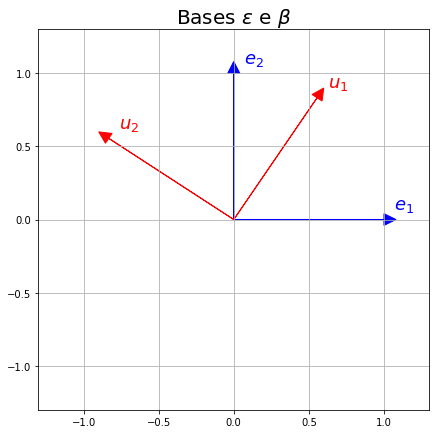

In [ ]:
orig = np.array([0.,0.])  # Ponto de onde partirão os vetores
e1 = np.array([1.,0.]) 
e2 = np.array([0., 1.])
z1 = np.array([2., 3.])
z2 = np.array([-3., 2.])
u1 = z1 / sp.linalg.norm(z1)
u2 = z2 / sp.linalg.norm(z2)


# Instrucoes para o plot
fig, ax = plt.subplots(figsize = (7,7))

# Desenhando vetores
ax.arrow(*orig, *e1, head_width=0.08, head_length=0.08, color = 'blue')  # head width e head length permitem personalizar a seta 
ax.arrow(*orig, *e2, head_width=0.08, head_length=0.08, color = 'blue') 
ax.arrow(*orig, *u1, head_width=0.08, head_length=0.08, color = 'red') 
ax.arrow(*orig, *u2, head_width=0.08, head_length=0.08, color = 'red')

# Usando o metodo anotate para inserir texto no plot. Aqui, usamos para colocar um label nos vetores
offset = 0.07
ax.annotate("$e_1$", orig + e1 + offset, color = 'blue', size = 18 )  # legenda do vetor v
ax.annotate("$e_2$", orig + e2 + offset, color = 'blue', size = 18 )  # legenda do vetor w
ax.annotate("$u_1$", orig + u1 + offset, color = 'red', size = 18 )  # legenda do vetor e1
ax.annotate("$u_2$", orig + u2 + offset, color = 'red', size = 18 )  # legenda do vetor e2

# Inserindo titulo e definindo limites no plot
ax.set_title('Bases $\epsilon$ e $\\beta$', fontdict = {'fontsize': 20} ) 
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)

ax.grid(True)
plt.show()



## Exercício 2



Crie a animação de um vetor, girando de forma anti-horária, em torno da origem, faz uma volta completa. 



*   Defina a cor e nome deste vetor de acordo com sua preferência. 
*   Desenhe o vetor no gráfico juntamente com seu nome, assim como é feito no tutorial $\mathtt{Introducao\_ao\_Colab\_pt2.ipynb}$ (usando **`ax.annotate`**).
*   Use como base o esqueleto abaixo.


In [ ]:
# Criando janela de plot
fig, ax = plt.subplots(figsize = (7,7))   
delay_time = 80
nframes = 100
v = np.array([1.,0.])
theta = 2 * np.pi

def animate(k):
    # Limpando a tela anterior
    ax.cla()
    # Calcular angulo associado ao frame
    thetaiter = ( k/(nframes - 1) ) * theta
    # Construir a matriz associada a rotacao anti-horaria
    Rot = np.array([[np.cos(thetaiter), -np.sin(thetaiter)], [np.sin(thetaiter), np.cos(thetaiter)]])
  
    # Atualizando vetor, rotacionando por thetaitergraus
    viter = Rot @ v

    # Descrevendo o plot do proximo frame
    ax.arrow(*orig, *viter, head_width=0.08, head_length=0.08, color = 'purple')
    ax.annotate("$v'$", orig + viter + offset, color = 'purple', size = 18 )

    ax.set_title('Exemplo de gráfico de vetores, iter {0}'.format(k), fontdict = {'fontsize': 20} ) 
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True)


    

    
anim = animation.FuncAnimation(fig, animate, 
                               frames = nframes, interval=delay_time);

plt.close()
HTML(anim.to_html5_video())

## Exercício 3



Um desafio maior é fazer um relógio com dois ponteiros, um 
mais longo e um mais curto, sendo que, quando o grande dá uma volta, o pequeno 
anda apenas o arco equivalente a uma hora e a seguinte.  Dessa vez os ponteiros 
terão que rodar no sentido horário, em vez de anti-horário 
como no realizado no exercício anterior. 



*   Para posicionar as horas no seu relógio, você pode usar **`ax.annotate`**.  No caso do relógio as strings são simplesmente os números 
das horas.
*    Não é necessário desenhar o contorno (circunferência) do relógio. 
*    Você também deve usar **`ax.annotate`** para assinar sua obra no canto direito inferior, colocando seu primeiro nome, seu último nome e seu DRE. 


 


![Relógio](https://static.escolakids.uol.com.br/image/Untitled-12_(1).jpg)


In [ ]:
# Criando janela de plot
fig, ax = plt.subplots(figsize = (8,8))   
delay_time = 100
nframes = 650
horas = np.array([0.,0.5])
mins = np.array([0, 1.])
theta = 2 * np.pi

def animate(k):
    # Limpando a tela anterior
    ax.cla()
    # Calcular angulo associado ao frame
    thetaiter = ( k/(nframes - 1) ) * theta 

    # Construir as matrizes associadas a rotacao horaria
    Rot_horas = np.array([[np.cos(-thetaiter), -np.sin(-thetaiter)], [np.sin(-thetaiter), np.cos(-thetaiter)]])
    Rot_min = np.array([[np.cos(-thetaiter * 12), -np.sin(-thetaiter * 12)], [np.sin(-thetaiter * 12), np.cos(-thetaiter*12)]])

    # Atualizando vetor, rotacionando por thetaitergraus
    horasiter = Rot_horas @ horas
    minsiter = Rot_min @ mins

    # Descrevendo o plot do proximo frame
    ax.arrow(*orig, *horasiter, head_width=0.08, head_length=0.08, color = 'black')
    ax.arrow(*orig, *minsiter, head_width=0.08, head_length=0.08, color = 'black')


    # Logica do label das horas
    numero_pos = np.array([0, 1.4])
    for j in range(0, 12):
      # Calcular angulo associado ao arco entre numeros do relogio
      angiter = (j / 12) * theta
      Rot_numeros = np.array([[np.cos(-angiter), -np.sin(-angiter)], [np.sin(-angiter), np.cos(-angiter)]])
      numero_pos_iter = Rot_numeros @ numero_pos 
      # Escrever label das horas
      if(j == 0):
        ax.annotate("12", orig + numero_pos_iter, color = 'black', size = 20 )
      else:
        ax.annotate("{0}".format(j), orig + numero_pos_iter, color = 'black', size = 20 )



    ax.set_title('Relógio, iter {0}'.format(k), fontdict = {'fontsize': 22} ) 
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)
    ax.grid(True)


    

    
anim = animation.FuncAnimation(fig, animate, 
                               frames = nframes, interval=delay_time);

plt.close()
HTML(anim.to_html5_video())